# MS 266:Final Project Draft

Create a draft version of your final project that contains all of the required components. See the project assignment for a detailed list of requirements.

Note that this draft will only be graded on the criteria listed under "reproducibility," not depth of analysis. However, this draft will be used to provide you with feedback, so the more you include the better feedback we can give.

Last worked on May 7 2025-Dom


## Introduction

* Brief Elkhorn Slough history, high errosion, eutrophic waters, agricultural farming, and water quality.
* Talk about the history of the data.Mention ESNERR and dataset from 1989.
* Talk about the history of the data (why missing content and changes in sites).
* Emphasize the different sites and how each is like a mosaic with different water qualities.
* Changes in method like measuring nitrate before was through the county. They used two different methods as samples were fresh and salt water requiring different protocols.

## Methods

1. Create Map
2. Load data
3. ESNERR RAW DATA
4. Create PCA
5. Subset Data 2015-2020

### 1. Load data

In [1]:
#Important for plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#For PCA
from scipy import linalg

#For mapping
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm as cmo
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
from cartopy.io import shapereader

In [2]:
#ESNERR Data
filename = 'ESNERR_DATA_25.csv'

#Map data
filename_site ='SITE.csv'
shp_file = 'wetland.shp'
wetland = shapereader.Reader(shp_file)

In [3]:
df = pd.read_csv(filename, na_values=-999)
df_site = pd.read_csv(filename_site, na_values=-999)

### 2. Create Map

* Image of Elkhorn Slough.
* Talk about history (1946), high errosion, eutrophic waters, agricultural farming, and water quality.
* If time interpolate map. Need help layering
* Mention ESNERR and dataset from 1989.

Text(0.5, 1.0, 'Elkhorn Slough Water Quality Sites')

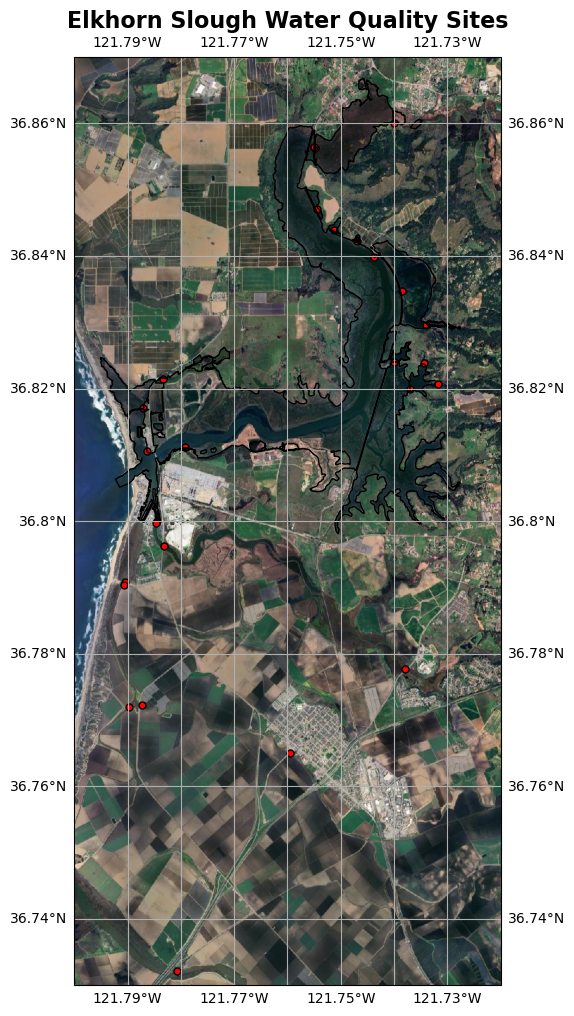

In [4]:
request = cimgt.GoogleTiles(style='satellite')

plt.figure(figsize=(6, 10))
ax = plt.axes(projection=ccrs.Mercator())

ax.add_image(request, 14)

#UTM-universal trans mercator. 
for geometry in wetland.geometries():
    ax.add_geometries(geometry, ccrs.UTM (zone=10), facecolor='none', edgecolor='black')

site_lats = df_site['AvgOfDD_LAT'].values
site_lons = df_site['AvgOfDD_LONG'].values
site_names = df_site['SITE'].values

ax.scatter(site_lons, site_lats, color='red', s=25, edgecolors='black', transform=ccrs.PlateCarree())

    
ax.set_extent([-121.8,-121.72, 36.73, 36.87], crs=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

plt.tight_layout()

plt.title("Elkhorn Slough Water Quality Sites", fontsize=16, fontweight='bold')
#plt.savefig("ES_MAP", bbox_inches='tight', dpi=300);

### 3. ESNERR DATA
* Check columns, dtypes, change objects to floats.
* Graph important parameter that impact chlorophyll a(limiting nutrients and light attenuation(turbidity)): raw
* Pick a site to graph (can't graph all 30 sites from 1989-2023)
* Kirby Park (KP): central location (best of both words)

In [5]:
df.columns #Check my data columns

Index(['ESNERR_StCode', 'Region', 'Date', 'AvgOfTime', 'AvgOfDD_LAT',
       'AvgOfDD_LONG', 'Temp C', 'Sal (PSU)', 'AvgOfpH', 'DO SAT %', 'DO mg/L',
       'Turb (NTU)', 'Chl (ug/L)', 'Floating Algae % Cover',
       'Ammonia as N mg/L', 'Umol Ammonia', 'Nitrate as N (mg/L)',
       'Umol Nitrate', 'Nitrite as N (mg/L)', 'MLML Nitrate mg/L',
       'MCCL Phosphate (mg/L)', 'Umol Phosphate', 'total Nitrogen',
       'Free Ammonia (mg/L)', 'Lab Chl a (ug/L)'],
      dtype='object')

In [6]:
df.dtypes 

ESNERR_StCode              object
Region                     object
Date                       object
AvgOfTime                 float64
AvgOfDD_LAT               float64
AvgOfDD_LONG              float64
Temp C                    float64
Sal (PSU)                 float64
AvgOfpH                   float64
DO SAT %                   object
DO mg/L                   float64
Turb (NTU)                 object
Chl (ug/L)                float64
Floating Algae % Cover    float64
Ammonia as N mg/L         float64
Umol Ammonia               object
Nitrate as N (mg/L)        object
Umol Nitrate               object
Nitrite as N (mg/L)       float64
MLML Nitrate mg/L          object
MCCL Phosphate (mg/L)      object
Umol Phosphate             object
total Nitrogen             object
Free Ammonia (mg/L)       float64
Lab Chl a (ug/L)           object
dtype: object

In [7]:
#Convert data to float and add NaN values
df['Lab Chl a (ug/L)'] = pd.to_numeric(df['Lab Chl a (ug/L)'], errors='coerce')
df['Turb (NTU)'] = pd.to_numeric(df['Turb (NTU)'], errors='coerce')
df['MCCL Phosphate (mg/L)'] = pd.to_numeric(df['MCCL Phosphate (mg/L)'], errors='coerce')
df['MLML Nitrate mg/L'] = pd.to_numeric(df['MLML Nitrate mg/L'], errors='coerce')

#Fix dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


In [8]:
df.dtypes

ESNERR_StCode                     object
Region                            object
Date                      datetime64[ns]
AvgOfTime                        float64
AvgOfDD_LAT                      float64
AvgOfDD_LONG                     float64
Temp C                           float64
Sal (PSU)                        float64
AvgOfpH                          float64
DO SAT %                          object
DO mg/L                          float64
Turb (NTU)                       float64
Chl (ug/L)                       float64
Floating Algae % Cover           float64
Ammonia as N mg/L                float64
Umol Ammonia                      object
Nitrate as N (mg/L)               object
Umol Nitrate                      object
Nitrite as N (mg/L)              float64
MLML Nitrate mg/L                float64
MCCL Phosphate (mg/L)            float64
Umol Phosphate                    object
total Nitrogen                    object
Free Ammonia (mg/L)              float64
Lab Chl a (ug/L)

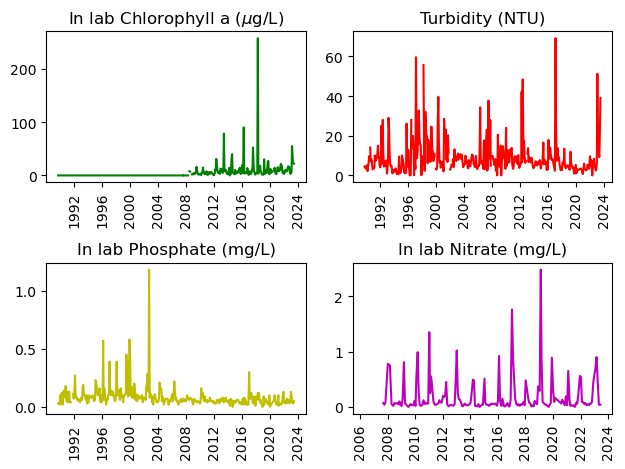

In [9]:
plt.figure()

plt.subplot(2,2,1)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['Lab Chl a (ug/L)'], 'g-')
plt.xticks(rotation=90)
plt.title('In lab Chlorophyll a ($\\mu$g/L)')

plt.subplot(2,2,2)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['Turb (NTU)'], 'r-')
plt.xticks(rotation=90) 
plt.title('Turbidity (NTU)')

plt.subplot(2,2,3)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['MCCL Phosphate (mg/L)'], 'y-')
plt.xticks(rotation=90) 
plt.title('In lab Phosphate (mg/L)')

plt.subplot(2,2,4)
plt.plot(df[df['ESNERR_StCode'] == 'KP']['Date'], df[df['ESNERR_StCode'] == 'KP']['MLML Nitrate mg/L'], 'm-')
plt.xticks(rotation=90) 
plt.title('In lab Nitrate (mg/L)')

plt.tight_layout()
#plt.savefig("ES_raw", bbox_inches='tight', dpi=300)
plt.show();

### 4. Create a PCA
* Create PCA over time using sites as variables, rows as time, and each matrice as a variable (used for presentation).
  - Note: too many sites, can't see data properly so using regional data to compare groupings of sites together.
* Look for unique sites, create matrices, create loop for each region. so it is populated by
* Remove NaN rows.
  - Note: Before I replaced the NaN values with the average, but that doesn't seem right.
* Calculate eigenvalue, eigen vector, percent variance, factor loading, A, lambda, R, z score, andPC1/2 scores.
* Do for turbidity and phosphate.

In [10]:
all_sites = df['ESNERR_StCode'].unique()
all_sites.shape

(31,)

In [11]:
all_sites # Too many on PCA will use regions instead

array(['BSE', 'BSW', 'JR', 'MCS', 'SKL', 'SRB', 'SRL', 'CC', 'HLE', 'HLW',
       'KP', 'PRN', 'PRS', 'RBR', 'RNM', 'RSM', 'SP', 'MLN', 'MLS', 'MDW',
       'APC', 'APN', 'APS', 'TS', 'STB', 'NERRNM', 'NERRVM', 'CAT', 'ROK',
       'MCS2', 'TS2'], dtype=object)

In [12]:
regions = df['Region'].unique()

In [13]:
df['Turb (NTU)'].shape

(9098,)

In [14]:
df = df.dropna(subset=['Turb (NTU)'])
df['Turb (NTU)'].shape # Check to make sure NaN values removed

(8797,)

In [15]:
np.isnan(df['MLML Nitrate mg/L']).sum() #Check number of NaN values

np.int64(4816)

In [16]:
k = len(regions)
N = len(df['Date'])
X = np.ones([N, k+1])
print(np.shape(X))

(8797, 7)


In [17]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(8797, 7))

In [18]:
regions

array(['Lower Slough', 'Salinas River', 'Upper Slough',
       'Tembladero Slough', 'Reserve', 'Freshwater Pond'], dtype=object)

In [19]:
df_sub = {}
for site in regions:
    df_sub[site]= df[df['Region'] == site]

In [20]:
X_turb = X # Save X so you can make another matrice for phosphate
for i, site in enumerate(regions):
    values = df_sub[site]['Turb (NTU)'].values 
    X_turb[:len(values), i] = values

In [21]:
X_turb

array([[11.  , 11.5 ,  4.75, ...,  6.  , 36.9 ,  1.  ],
       [ 4.5 ,  9.  ,  4.  , ..., 14.25,  3.43,  1.  ],
       [ 3.  , 18.  ,  4.5 , ...,  4.8 , 29.18,  1.  ],
       ...,
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]], shape=(8797, 7))

In [22]:
X_turb

array([[11.  , 11.5 ,  4.75, ...,  6.  , 36.9 ,  1.  ],
       [ 4.5 ,  9.  ,  4.  , ..., 14.25,  3.43,  1.  ],
       [ 3.  , 18.  ,  4.5 , ...,  4.8 , 29.18,  1.  ],
       ...,
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]], shape=(8797, 7))

In [23]:
df_sub['Lower Slough']['Turb (NTU)'] #Check to see if matrice is in order for region/site

0       11.00
1        4.50
2        3.00
3        6.00
4        2.00
        ...  
9082     6.77
9084     7.38
9085     6.74
9087     4.20
9093     5.55
Name: Turb (NTU), Length: 2957, dtype: float64

In [24]:
np.shape(X_turb)

(8797, 7)

In [25]:
X_turb = X_turb[:,:-1]
np.shape(X_turb)# remove 1s

(8797, 6)

In [26]:
X_turb

array([[11.  , 11.5 ,  4.75,  5.75,  6.  , 36.9 ],
       [ 4.5 ,  9.  ,  4.  ,  8.25, 14.25,  3.43],
       [ 3.  , 18.  ,  4.5 ,  2.5 ,  4.8 , 29.18],
       ...,
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ]], shape=(8797, 6))

In [27]:
X_turb_z = (X_turb - np.mean(X_turb, axis=0)) / np.std(X_turb, axis=0, ddof=1) #zscore

In [28]:
X_turb_z

array([[ 0.03520643,  0.36033716, -0.10698872, -0.19071945,  0.16367886,
         2.47634428],
       [-0.14311394,  0.25241314, -0.12822717, -0.15125166,  0.6495623 ,
         0.08930767],
       [-0.18426479,  0.64093961, -0.1140682 , -0.24202757,  0.0930049 ,
         1.92576398],
       ...,
       [-0.2391326 , -0.09294372, -0.21318095, -0.26570824, -0.13079596,
        -0.08399675],
       [-0.2391326 , -0.09294372, -0.21318095, -0.26570824, -0.13079596,
        -0.08399675],
       [-0.2391326 , -0.09294372, -0.21318095, -0.26570824, -0.13079596,
        -0.08399675]], shape=(8797, 6))

In [29]:
R_turb = np.cov(X_turb_z, rowvar = False) #Using correlation matrix because variables different unit
np.shape(R_turb)

(6, 6)

In [30]:
#R_sal #Too long put # to make notebook shorter

In [31]:
#Calculate eigen values
val, vec = linalg.eig(R_turb)
val = np.real(val)
print(val) #eigen values

[1.38691677 1.12117324 0.77879181 0.95795875 0.90477851 0.85038092]


In [32]:
#Sort values and vectors
idx = np.argsort(val)[::-1]   
sort_values = val[idx]
sort_vector = vec[:,idx]
print(sort_values)

[1.38691677 1.12117324 0.95795875 0.90477851 0.85038092 0.77879181]


In [33]:
#sort regions
sorted_sites = regions[idx]
print(sorted_sites)

['Lower Slough' 'Salinas River' 'Tembladero Slough' 'Reserve'
 'Freshwater Pond' 'Upper Slough']


In [34]:
percent_variance = 100*val/np.sum(val)
print(percent_variance[0:2]) 

[23.11527955 18.68622071]


In [35]:
Lambda = np.diag(val)
#print(Lambda)

In [36]:
A = np.dot(vec, Lambda**0.5)
#print(A)

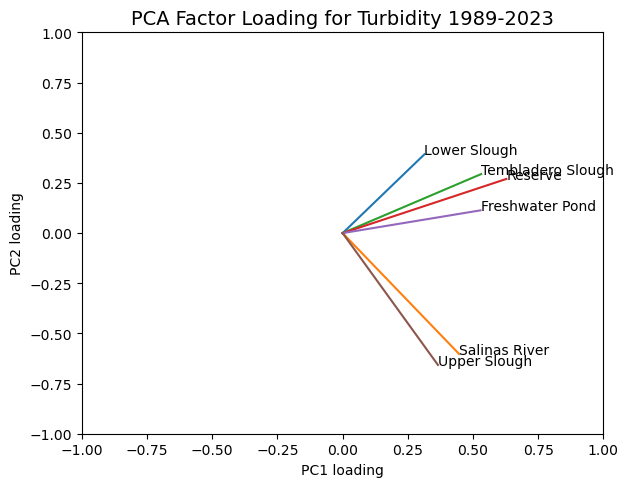

In [37]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

for i,txt in enumerate(sorted_sites):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-')
    plt.text(A[i,0],A[i,1],txt)

plt.tight_layout()
plt.title("PCA Factor Loading for Turbidity 1989-2023", fontsize=14)
#plt.savefig("PCA_turb2", bbox_inches='tight', dpi=300)
plt.show()

In [38]:
PCA_score = X_turb_z@vec

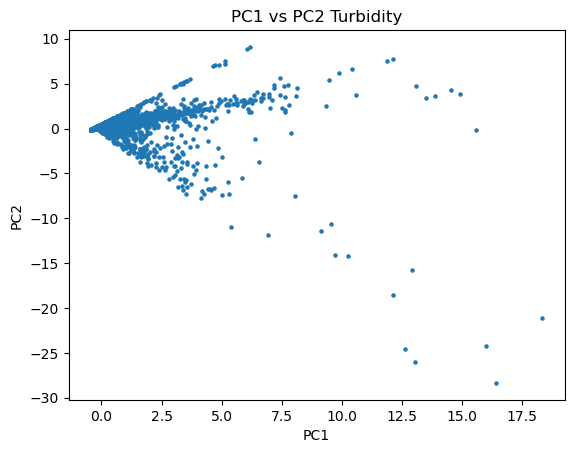

In [39]:
plt.figure()
plt.scatter(PCA_score[:,0], PCA_score[:,1], s =5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 Turbidity')
#plt.savefig("PC1&2_turb", bbox_inches='tight', dpi=300)
plt.show()

Repeat with phosphate: Cant do nitrate or chlorophyll (too many missing data)

### 5. Subset Data 2015-2020
* Due to nature of data (chlorophyll and nitrate were not measured until 2008) create a subset from 2015-2020 (during El nino)
* Also for outdated methods.
* See the average for each site (redo code) vs turbidity, chlorophyll, nitrate, and phosphate.
* Compare site directly outside Salina River (flows into Slough) like MCS and measure patterns.
* Look at impact of eutrophication

In [40]:
#Find data range
Data_range = (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2020)
df_range = df[Data_range]

In [41]:
df_range.columns

Index(['ESNERR_StCode', 'Region', 'Date', 'AvgOfTime', 'AvgOfDD_LAT',
       'AvgOfDD_LONG', 'Temp C', 'Sal (PSU)', 'AvgOfpH', 'DO SAT %', 'DO mg/L',
       'Turb (NTU)', 'Chl (ug/L)', 'Floating Algae % Cover',
       'Ammonia as N mg/L', 'Umol Ammonia', 'Nitrate as N (mg/L)',
       'Umol Nitrate', 'Nitrite as N (mg/L)', 'MLML Nitrate mg/L',
       'MCCL Phosphate (mg/L)', 'Umol Phosphate', 'total Nitrogen',
       'Free Ammonia (mg/L)', 'Lab Chl a (ug/L)'],
      dtype='object')

In [42]:
df_range['ESNERR_StCode'].unique()

array(['APC', 'APN', 'APS', 'BSE', 'CAT', 'CC', 'HLE', 'HLW', 'JR', 'KP',
       'MCS', 'MDW', 'MLN', 'MLS', 'NERRNM', 'NERRVM', 'PRN', 'PRS',
       'RBR', 'RSM', 'SKL', 'SP', 'SRB', 'STB', 'TS', 'TS2', 'MCS2',
       'ROK'], dtype=object)

In [43]:
mean_nitrate = df_range['MLML Nitrate mg/L'].mean()
mean_chl = df_range['Lab Chl a (ug/L)'].mean()
mean_phos = df_range['MCCL Phosphate (mg/L)'].mean()
mean_turbidity = df_range['Turb (NTU)'].mean()

In [44]:
std_turbidity = df_range['Turb (NTU)'].std()
std_nitrate = df_range['MLML Nitrate mg/L'].std()
std_phos = df_range['MCCL Phosphate (mg/L)'].std()
std_chl = df_range['Lab Chl a (ug/L)'].std()

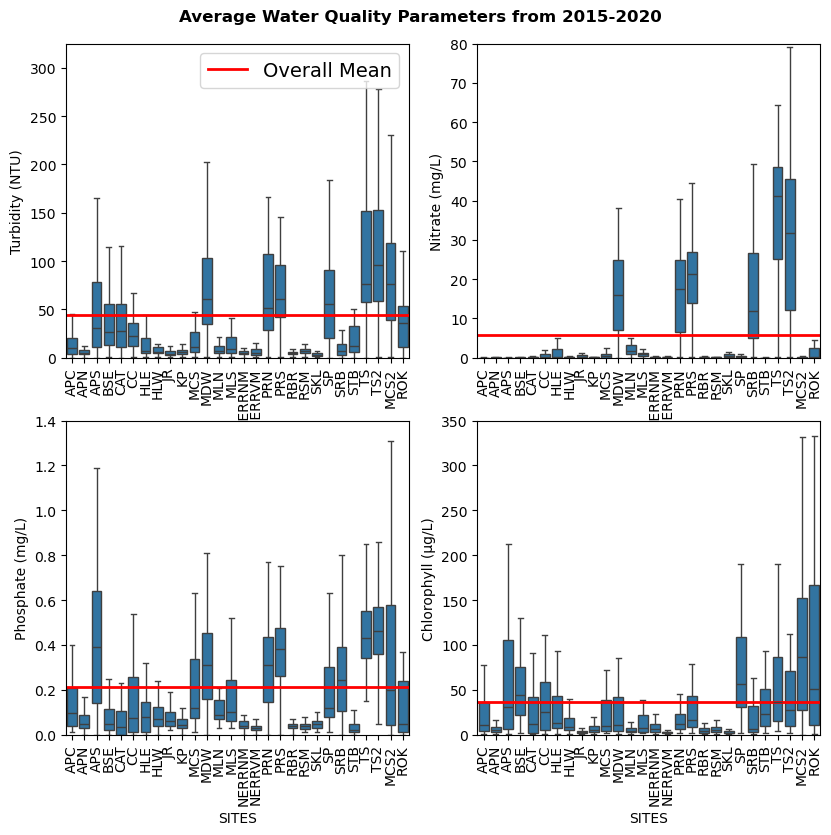

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(8.5, 8))

#I think sns has better box plot so i used it.

sns.boxplot(x=df_range['ESNERR_StCode'], y='Turb (NTU)', data=df_range, ax=axes[0, 0], flierprops=dict(marker='', color='white', markersize=0)) 
axes[0, 0].set_ylabel('Turbidity (NTU)')
axes[0, 0].set_ylim(0, 325) #Depending on range set the limits
axes[0, 0].axhline(y=mean_turbidity, color='red', linestyle='-', linewidth=2, label='Overall Mean')#Mean line

sns.boxplot(x=df_range['ESNERR_StCode'], y='MLML Nitrate mg/L', data=df_range, ax=axes[0, 1], flierprops=dict(marker='', color='white', markersize=0)) 
axes[0, 1].set_ylabel('Nitrate (mg/L)')
axes[0, 1].set_ylim(0, 80) 
axes[0, 1].axhline(y=mean_nitrate, color='red', linestyle='-', linewidth=2, label='Overall Mean')

sns.boxplot(x=df_range['ESNERR_StCode'], y='MCCL Phosphate (mg/L)', data=df_range, ax=axes[1, 0], flierprops=dict(marker='', color='white', markersize=0)) 
axes[1, 0].set_xlabel('SITES')
axes[1, 0].set_ylabel('Phosphate (mg/L)')
axes[1, 0].set_ylim(0, 1.4)
axes[1, 0].axhline(y=mean_phos, color='red', linestyle='-', linewidth=2, label='Overall Mean')

sns.boxplot(x=df_range['ESNERR_StCode'], y='Lab Chl a (ug/L)', data=df_range, ax=axes[1, 1], flierprops=dict(marker='', color='white', markersize=0)) 
axes[1, 1].set_xlabel('SITES')
axes[1, 1].set_ylabel('Chlorophyll (μg/L)')
axes[1, 1].set_ylim(0, 350)
axes[1, 1].axhline(y=mean_chl, color='red', linestyle='-', linewidth=2, label='Overall Mean')


fig.suptitle('Average Water Quality Parameters from 2015-2020', fontsize=12, fontweight='bold') 

plt.tight_layout()  
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=.20, wspace=0.2) 

axes[0, 0].legend(loc='upper right', fontsize=14)#Move or adjust legend

#plt.savefig("ES_avgs_2015-20", bbox_inches='tight', dpi=300)
plt.show()

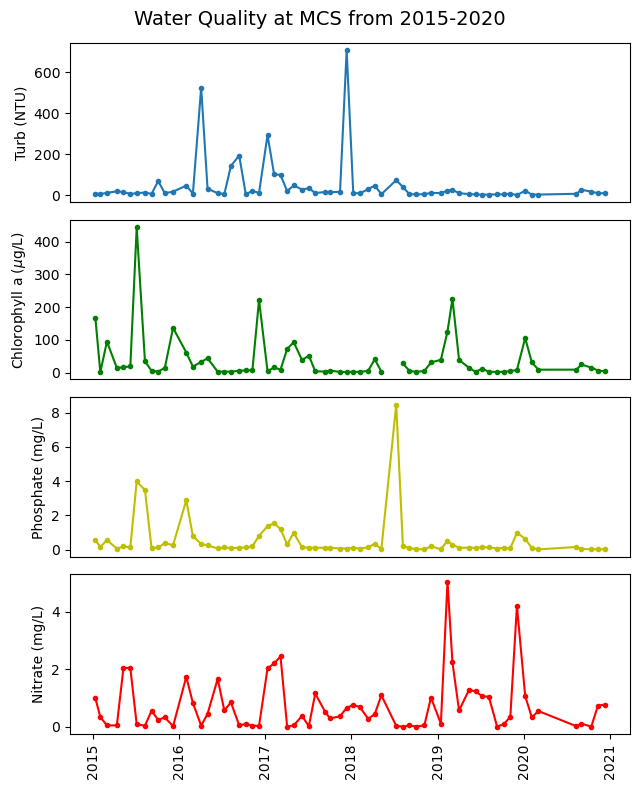

In [46]:
plt.figure(figsize=(6.5, 8)) 
plt.subplot(4,1,1)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['Turb (NTU)'],'.-')
plt.xticks([]) 
plt.ylabel('Turb (NTU)')

plt.subplot(4,1,2)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['Lab Chl a (ug/L)'], 'g.-')
plt.xticks([]) 
plt.ylabel('Chlorophyll a ($\\mu$g/L)')

plt.subplot(4,1,3)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['MCCL Phosphate (mg/L)'], 'y.-')
plt.xticks([]) 
plt.ylabel('Phosphate (mg/L)')

plt.subplot(4,1,4)
plt.plot(df_range[df_range['ESNERR_StCode'] == 'MCS']['Date'], df_range[df_range['ESNERR_StCode'] == 'MCS']['MLML Nitrate mg/L'], 'r.-')
plt.xticks(rotation=90) 
plt.ylabel('Nitrate (mg/L)')

plt.suptitle('Water Quality at MCS from 2015-2020', fontsize=14)
plt.tight_layout()

#plt.savefig("MCS.png", bbox_inches='tight', dpi=300)
plt.show()

* Maybe do a welch test? Not sure it if fits with this data.

In [47]:
x = df_range[df_range['ESNERR_StCode'] == 'MCS']['MLML Nitrate mg/L']
y = df_range[df_range['ESNERR_StCode'] == 'KP']['MLML Nitrate mg/L']

In [48]:
from scipy import stats
stats.ttest_ind(x,y, equal_var=False)

TtestResult(statistic=np.float64(4.066608949215089), pvalue=np.float64(0.0001035935610602597), df=np.float64(88.02993196272553))

### Results
RAW DATA
1. RAW data shows above average water parameters (Use EPA levels)
2. Chlorophyll and nitrate not measured until 2008. Different method.
3. Missing chlorophyll filled in with zeros (look at graph). Human error.

PCA
1. Negative factor loading. Different groupings for each region/site
3. Percent variance from PC1 and 2 loading
4. Cumulative variance
5. PCA scores

Subset Data
1.  Salinas sites show above average turbidity, phosphate, nitrate.
2.  MCS data shows chlorophyll biomass tied to eutrophic conditions.
3.  When nitrate is high no bloom occurs which could mean phosphate is the limiting nutrient.
4.  2015-2016 El Nino raining caused spikes.

### Conclusions

* Morro Cojo/Salinas river above average turbidity, phosphate, nitrate, and chlorophyll due to AG runoff
* Importance of turbidity and phosphate (limiting)
* Elkhorn Slough structuring sites and regions.

### Future Work
* Adapting data for genetic data
* Using it with microbial community composition and seeing how it impacts its diversity

### References
* Look at readings for the week this concept was learned